# Data cleaning

### Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fastai.imports import *


#Import
data = pd.read_csv('dataset_mood_smartphone.csv', parse_dates=['time'])

#Convert time column to date time format
data['time'] = pd.to_datetime(data['time']) 

### Changing to multi index with time and ID

In [2]:
data = data.set_index(['id', 'time'])

We want to reformat the data such that we have a number of observations for each patient, with each observation consisting of some time period e.g one week. Each observation will have a measurement for each attribute (e.g., Avg time spent on weather app over period) with the dependent variable as the average mood over the period. 

In [3]:
#reshaping the dataframe so that each column is a feature, indexed first by patient then time
pivoted_table = pd.pivot_table(data, index=['id', 'time'], columns='variable', values='value')
data2 = pivoted_table

### Compile the data into observations for each mood measurement
It seems like im loosing some of the starting bits of the data here.  Im a  bit confused as to why.... It might be that id doesnt exist for the other index other than the first.  This needs to be explored.  

In [4]:
import copy

#Make copy of data
data3 = copy.deepcopy(pivoted_table)

#Setup new frame
df = pd.DataFrame(columns=data3.columns)

df.insert(0,'time', "")
df.insert(0,'id', "")
df_lost = copy.deepcopy(df)

prev_id = data3.index[0][0]
i_prev = 0
ave_list = ['circumplex.arousal', 'mood', 'circumplex.valence']

tmp = []
for i in range(0, len(data3)):
    if data3.index[i][0] != prev_id:
        for k in range(i_prev, i):
            tmp.append(data3.index[i_prev][0])
            tmp.append(data3.index[k][1])
            for j in range(0, len(data3.columns)):
                tmp.append(data3.iloc[k,j])
            #print(len(tmp))
            df_lost.loc[len(df_lost)] = tmp
            tmp = []
        i_prev = i
        prev_id = data3.index[i][0]
    if not pd.isnull(data3['mood'].iloc[i]):
        tmp.append(data3.index[i_prev][0])
        tmp.append(data3.index[i][1])
        for j in range(0, len(data3.columns)):
            if any(data3.columns[j] in s for s in ave_list):
                tmp.append(data3.iloc[i_prev:i+1,j].mean())
            else:
                tmp.append(data3.iloc[i_prev:i+1,j].sum())
        df.loc[len(df)] = tmp
        tmp = []
        i_prev = i+1
        
df = df.set_index(['id', 'time'])

## Rolling Windows

In [34]:
#Import
data = pd.read_csv('dataset_mood_smartphone.csv', parse_dates=['time'])

#Convert time column to date time format
data['time'] = pd.to_datetime(data['time']) 

# Clea invalid responses
data = data.loc[(((data.value >= 1) & (data.value <= 10))|(data.variable != 'mood'))]
print(len(data))
data = data.loc[(((data.value >= -2) & (data.value <= 2))|(data.variable != 'circumplex.arousal'))]
print(len(data))
data = data.loc[(((data.value >= -2) & (data.value <= 2))|(data.variable != 'circumplex.valence'))]
print(len(data))
data = data.loc[(((data.value >= 0) & (data.value <= 1))|(data.variable != 'activity'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'screen'))]
print(len(data))
data = data.loc[(((data.value == 0) | (data.value == 1))|(data.variable != 'call'))]
print(len(data))
data = data.loc[(((data.value == 0) | (data.value == 1))|(data.variable != 'sms'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.communication'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.entertainment'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.finance'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.game'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.office'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.other'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.social'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.travel'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.unknown'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.utilities'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.weather'))]
print(len(data))
data = data.set_index(['id', 'time'])
pivoted_table = pd.pivot_table(data, index=['id', 'time'], columns='variable', values='value')
data_formated = pivoted_table

376912
376866
376710
376710
376710
376710
376710
376710
376709
376709
376709
376709
376709
376709
376709
376709
376709
376709


In [47]:
test = data_formated.loc[data_formated.index.get_level_values('id') == 'AS14.33']
test

variable                         activity  appCat.builtin  \
id      time                                                
AS14.33 2014-02-17 15:52:18.940       NaN             NaN   
        2014-02-17 16:52:54.555       NaN             NaN   
        2014-02-17 16:56:58.467       NaN             NaN   
        2014-02-17 16:57:46.729       NaN             NaN   
        2014-02-17 16:58:25.515       NaN             NaN   
        2014-02-17 16:58:57.180       NaN             NaN   
        2014-02-17 17:02:24.756       NaN             NaN   
        2014-02-17 17:02:33.292       NaN             NaN   
        2014-02-17 17:03:49.815       NaN             NaN   
        2014-02-17 17:07:29.891       NaN             NaN   
        2014-02-17 17:09:04.187       NaN             NaN   
        2014-02-17 17:09:39.894       NaN             NaN   
        2014-02-17 17:22:48.815       NaN             NaN   
        2014-02-18 15:52:32.072       NaN             NaN   
        2014-02-18 15:55:42.585       NaN             NaN   
        2014-02-18 16:30:08.821       NaN             NaN   
        2014-02-18 16:31:11.529       NaN             NaN   
        2014-02-18 21:43:43.375       NaN             NaN   
        2014-02-19 12:10:17.506       NaN             NaN   
        2014-02-19 12:11:51.279       NaN             NaN   
        2014-02-19 12:12:03.519       NaN             NaN   
        2014-02-19 12:56:58.539       NaN             NaN   
        2014-02-19 13:48:24.505       NaN             NaN   
        2014-02-19 15:22:34.562       NaN             NaN   
        2014-02-20 07:00:51.911       NaN             NaN   
        2014-02-20 08:28:30.315       NaN             NaN   
        2014-02-20 14:01:32.996       NaN             NaN   
        2014-02-20 14:49:33.671       NaN             NaN   
        2014-02-20 15:14:43.484       NaN             NaN   
        2014-02-20 21:52:53.700       NaN             NaN   
...                                   ...             ...   
        2014-05-30 21:58:51.395       NaN           3.018   
        2014-05-30 21:58:54.421       NaN             NaN   
        2014-05-30 21:59:57.865       NaN          21.075   
        2014-05-30 22:00:00.000     0.375             NaN   
        2014-05-30 22:00:18.943       NaN          72.213   
        2014-05-30 22:01:31.157       NaN           1.016   
        2014-05-30 22:01:32.177       NaN           3.019   
        2014-05-30 22:01:35.197       NaN          25.076   
        2014-05-30 22:02:00.275       NaN             NaN   
        2014-05-30 22:02:24.378       NaN          23.085   
        2014-05-30 22:02:47.464       NaN          27.386   
        2014-05-30 22:03:14.875       NaN           4.016   
        2014-05-30 22:03:19.157       NaN          13.045   
        2014-05-30 22:03:32.207       NaN           2.004   
        2014-05-30 22:03:34.213       NaN          47.219   
        2014-05-30 22:04:21.434       NaN           7.018   
        2014-05-30 22:04:28.453       NaN             NaN   
        2014-05-30 22:04:31.486       NaN          22.076   
        2014-05-30 22:04:53.562       NaN          71.257   
        2014-05-30 22:06:04.821       NaN           3.005   
        2014-05-30 22:06:07.826       NaN             NaN   
        2014-05-30 22:07:36.256       NaN           1.266   
        2014-05-30 22:18:11.591       NaN             NaN   
        2014-05-30 22:31:07.964       NaN             NaN   
        2014-05-30 22:32:00.898       NaN           4.072   
        2014-05-30 22:32:05.016       NaN             NaN   
        2014-05-30 22:32:11.049       NaN           3.122   
        2014-05-30 22:32:14.240       NaN           1.003   
        2014-05-30 22:32:15.246       NaN           4.134   
        2014-05-31 12:00:00.000       NaN             NaN   

variable                         appCat.communication  appCat.entertainment  \
id      time                                                                 

#### Summing for each day for each id and for each day aggrigated

In [41]:
#each person each day

data1D_indiv =  data_formated.groupby([pd.Grouper(level='id'), pd.Grouper(freq='1D', level='time') 
                             ]).agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})


#data1D_indiv = data1D_indiv.dropna(subset=['mood'])
data1D_indiv.fillna(value = 0, inplace=True)
id_list = data1D_indiv.index.levels[0].tolist()
df_list = []
for cur_id in id_list:
    print(cur_id)
    df_personal = data1D_indiv.loc[data1D_indiv.index.get_level_values('id') == cur_id]
    for i in range(1,len(df_personal.index)-1):
        #print((df_personal['mood'].iloc[i]))
        if df_personal['mood'].iloc[i] == 0:
            #print('Are we here')
            if df_personal['mood'].iloc[i-1] != 0 and df_personal['mood'].iloc[i+1] != 0:
                print("found one")
                df_personal['mood'].iloc[i] = ((df_personal['mood'].iloc[i-1]+df_personal['mood'].iloc[i+1])/2)
                


mood_daily = data1D_indiv['mood']
#print(len(mood_daily))
mood_only = pd.DataFrame(mood_daily.dropna())


#Aggrigated each day

data1D_agg =  data_formated.groupby([pd.Grouper(freq='1D', level='time') 
                             ]).agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})

#print(data1D_agg['mood'].loc['2014-05-01':'2014-05-15'])

data1D_agg['mood'].loc['2014-05-06'] = (data1D_agg['mood'].loc['2014-05-05']+data1D_agg['mood'].loc['2014-05-07'])/2

data1D_agg = data1D_agg.dropna(subset=['mood'])

#print(data1D_agg['mood'].loc['2014-05-01':'2014-05-15'])

#print(len(data1D_agg))

AS14.01
AS14.02
AS14.03
found one


/home/jordan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


AS14.05
AS14.06
found one
AS14.07
AS14.08
AS14.09
AS14.12
AS14.13
AS14.14
found one
AS14.15
found one
AS14.16
found one
AS14.17
found one
AS14.19
AS14.20
AS14.23
found one
AS14.24
found one
AS14.25
found one
AS14.26
found one
AS14.27
found one
AS14.28
found one
AS14.29
found one
found one
AS14.30
AS14.31
AS14.32
found one
found one
found one
AS14.33
found one


In [25]:
# Rollinng averages for aggregate of all with "fixing" for every catagory
from datetime import datetime, timedelta

lon_len = 0
lon_start = 0
lon_end = 0
cur_len = 0
cur_start = 0
cur_end = 0

#df_tmp = data1D_agg
df_tmp = data1D_agg
ave_list = ['circumplex.arousal', 'mood', 'circumplex.valence']
df_tmp = df_tmp.dropna(subset=['mood'])

print(len(df_tmp))

for i in range(1,len(df_tmp)-1):
    #print(str(mood_agg.index[i-1] == (mood_agg.index[i] - timedelta(days=1)))+str(mood_agg.index[i+1] == (mood_agg.index[i] + timedelta(days=1))))
    if (df_tmp.index[i-1] == (df_tmp.index[i] - timedelta(days=1))) and (df_tmp.index[i+1] == (df_tmp.index[i] + timedelta(days=1))):
        #print('adding to length')
        cur_end = i
        cur_len += 1
    elif cur_len>lon_len:
        print("broken on" + str(df_tmp.index[i]))
        #print(cur_len)
        lon_len = cur_len
        lon_start = cur_start
        lon_end = cur_end
        cur_start = i+1
        cur_end = i+1
        cur_len = 0
    else:
        print("broken on" + str(df_tmp.index[i]))
        cur_start = i+1
        cur_end = i+1

if cur_len>lon_len:
        print(cur_len)
        lon_len = cur_len
        lon_start = cur_start
        lon_end = cur_end
        cur_start = i+1
        cur_end = i+1
        cur_len = 0

print(len(df_tmp))
print(lon_len)

print(lon_start)
print(lon_end)

window = 5

df_continuous = df_tmp.iloc[lon_start:lon_end]

df_mood_store = pd.DataFrame(copy.deepcopy(df_continuous['mood']))

df_new_mood = copy.deepcopy(df_mood_store)
offset = window-1
for i in range(0,len(df_mood_store)):
    if i < len(df_mood_store)-offset:
        df_new_mood.iloc[i] = df_mood_store.iloc[i+offset]
    else:
        df_new_mood.iloc[i] = np.nan
        
df_new_mood.head()

rolling_cont_unfluffed = df_continuous.rolling(window, min_periods = window).sum()
rolling_cont_unfluffed = rolling_cont_unfluffed.dropna()
rolling_cont_unfluffed = rolling_cont_unfluffed.drop(ave_list, axis = 1)
rolling_cont_unfluffed = pd.concat([rolling_cont_unfluffed,df_continuous[ave_list].rolling(window, min_periods = window).mean()], axis = 1)
rolling_cont_unfluffed = rolling_cont_unfluffed.drop(['mood'], axis = 1)
rolling_cont_unfluffed.head()
rolling_cont_unfluffed = pd.concat([rolling_cont_unfluffed,df_new_mood], axis = 1)
rolling_cont_unfluffed = rolling_cont_unfluffed.iloc[window-1:]

print(len(rolling_cont_unfluffed))
agg_rolling_all = rolling_cont_unfluffed

99
broken on2014-02-27 00:00:00
broken on2014-03-04 00:00:00
95
99
95
3
97
90


In [45]:
# Personal Rollinng averages for aggregate for every catagory
from datetime import datetime, timedelta


ave_list = ['circumplex.arousal', 'mood', 'circumplex.valence']

lon_len = 0
lon_start = 0
lon_end = 0
cur_len = 0
cur_start = 0
cur_end = 0

df_tmp = data1D_indiv

df_tmp = df_tmp.dropna(subset=['mood'])

id_list = df_tmp.index.levels[0].tolist()

df_list = []

for cur_id in id_list:
    print(cur_id)
    lon_len = 0
    lon_start = 0
    lon_end = 0
    cur_len = 0
    cur_start = 0
    cur_end = 0
    df_personal_roll = df_tmp.loc[df_tmp.index.get_level_values('id') == cur_id]
    for i in range(1,len(df_personal_roll.index)-1):
        #print(str(mood_agg.index[i-1] == (mood_agg.index[i] - timedelta(days=1)))+str(mood_agg.index[i+1] == (mood_agg.index[i] + timedelta(days=1))))
        if (df_personal_roll.index[i-1][1] == (df_personal_roll.index[i][1] - timedelta(days=1))) and (df_personal_roll.index[i+1][1] == (df_personal_roll.index[i][1] + timedelta(days=1))):
            #print('adding to length')
            cur_end = i
            cur_len += 1
        elif cur_len>lon_len:
            #print("broken on" + str(df_personal_roll.index[i][1]))
            #print(cur_len)
            lon_len = cur_len
            lon_start = cur_start
            lon_end = cur_end
            cur_start = i+1
            cur_end = i+1
            cur_len = 0
        else:
            #print("broken on" + str(df_personal_roll.index[i][1]))
            cur_start = i+1
            cur_end = i+1

    if cur_len>lon_len:
            #print(cur_len)
            lon_len = cur_len
            lon_start = cur_start
            lon_end = cur_end
            cur_start = i+1
            cur_end = i+1
            cur_len = 0

#     print(len(mood_agg))
    print(lon_len)

#     print(lon_start)
#     print(lon_end)

    df_continuous = df_personal_roll.iloc[lon_start:lon_end]
    #print(df_continuous.head())
    
    df_mood_store = copy.deepcopy(df_continuous['mood'])
    df_new_mood = df_mood_store
    for i in range(0,len(df_mood_store)):
        if i < len(df_mood_store)-4:
            df_new_mood.iloc[i] = df_mood_store[i+4]
        else:
            df_new_mood.iloc[i] = np.nan

    window = 5

    rolling_personal = df_continuous.rolling(window, min_periods = window).sum()
    rolling_personal = rolling_personal.dropna()
    rolling_personal = rolling_personal.drop(ave_list, axis = 1)
    rolling_personal = pd.concat([rolling_personal,df_continuous[ave_list].rolling(window, min_periods = window).mean()], axis = 1)
    rolling_personal = rolling_personal.drop(['mood'], axis = 1)
    rolling_personal = pd.concat([rolling_personal,df_new_mood], axis = 1)
    rolling_personal = rolling_personal.iloc[window-1:]
    
    df_list.append(rolling_personal)
    
combined = pd.concat(df_list)

agg_rolling_indi = combined

AS14.01
59
AS14.02
66
AS14.03
55
AS14.05
52
AS14.06
52
AS14.07
48
AS14.08
60
AS14.09
54
AS14.12
43
AS14.13
51
AS14.14
53
AS14.15
65
AS14.16
59
AS14.17
62
AS14.19
63
AS14.20
47
AS14.23
43
AS14.24
60
AS14.25
45
AS14.26
72
AS14.27
49
AS14.28
38
AS14.29
44
AS14.30
50
AS14.31
36
AS14.32
71
AS14.33
80


### Aggregating the data into daily windows for each patient

For all of the apps, sms and calls we take the sum over the windows, since they are either times spent or number of calls etc. For arousal, mood and valence we take the mean.

In [20]:
#This is currently grouping observations into 2 day windows, can make a decision on this later
data2 = data2.astype(float)
data2 = data2.groupby([pd.Grouper(level='id'), pd.Grouper(freq='2D', level='time') 
                             ]).agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})


### Removing observations/days without mood measurements

In [6]:
data2 = data2.dropna(subset=['mood'])
data2.fillna(value=0, inplace=True)

In [7]:
df = df.dropna(subset=['mood'])
df.fillna(value=0, inplace=True)

### Remove outliers

It is clear from the plots that there are some outliers that are nonsensical. No values should be negative apart from those for arousal or valence, which have a minimum value of -2. Therefore a good starting point is to remove any values which are less than that for the whole dataframe.

In [8]:
from scipy import stats

data2 = data2.astype(float)
data2 = data2[(np.abs(stats.zscore(data2)) < 3).all(axis=1)]

In [10]:
data2

activity  appCat.builtin  appCat.communication  \
id      time                                                         
AS14.01 2014-02-26  0.000000           0.000                 0.000   
        2014-02-27  0.000000           0.000                 0.000   
        2014-03-22  3.790084         731.429              4962.918   
        2014-03-23  2.141117        1286.246              5237.319   
        2014-03-24  1.895065         866.956              9270.629   
        2014-03-26  2.431400        1167.497              8988.753   
        2014-03-27  3.509234        1229.327              6936.512   
        2014-03-28  2.296753       10062.595               866.833   
        2014-03-30  0.687302         414.365              1298.505   
        2014-03-31  1.692132        2961.405              5332.637   
        2014-04-04  3.040543        1957.829              5481.628   
        2014-04-06  1.545787        4548.662              3355.743   
        2014-04-07  1.216095         927.377              7355.015   
        2014-04-08  1.807849         892.689              9477.553   
        2014-04-10  1.895115         715.355              4881.411   
        2014-04-11  1.919669        3369.031              3336.592   
        2014-04-12  1.733977         302.446              6595.083   
        2014-04-13  0.336512         447.415              1096.795   
        2014-04-15  2.162692        1596.356              6224.231   
        2014-04-16  2.786648         923.613              5175.016   
        2014-04-18  2.256792        1860.898              5341.657   
        2014-04-19  2.386366         946.190              2728.260   
        2014-04-20  1.720774         897.086              4984.724   
        2014-04-21  2.448985        3442.232              2004.347   
        2014-04-23  1.103657        1130.842              8928.472   
        2014-04-25  2.617466         817.613              7279.144   
        2014-04-26  4.927722         864.519              2567.857   
        2014-04-27  0.670536        1291.314              2431.498   
        2014-04-29  2.466198        5289.913              3834.645   
        2014-05-04  2.860028        1758.438              3381.689   
...                      ...             ...                   ...   
AS14.33 2014-04-18  0.884446        1555.364              1833.537   
        2014-04-19  6.223335        2879.461              3989.499   
        2014-04-23  0.185165         865.250               276.217   
        2014-04-24  2.416907        3016.506              2518.994   
        2014-04-29  1.913851        4191.713              1237.230   
        2014-04-30  0.318569        1088.130               671.269   
        2014-05-01  4.265357        3494.608              1378.092   
        2014-05-05  0.849829        3414.668              1233.936   
        2014-05-07  0.042230         286.712                 7.083   
        2014-05-08  1.711912        2349.879              1892.662   
        2014-05-10  2.184266        2091.841               867.868   
        2014-05-11  0.267922         259.893               504.549   
        2014-05-12  0.576418        1196.532              1065.885   
        2014-05-13  2.659314        2505.530              4340.772   
        2014-05-14  0.091667         268.980               160.882   
        2014-05-16  1.242752        2212.464               541.080   
        2014-05-17  0.400166        1018.142               428.547   
        2014-05-19  0.219523         240.592               364.290   
        2014-05-20  0.386025         487.319               867.491   
        2014-05-21  0.412342         661.679              1814.912   
        2014-05-22  0.242298         749.770              1272.216   
        2014-05-23  0.452906         980.646               819.557   
        2014-05-24  0.342866         947.927              2263.912   
        2014-05-25  3.713814        2687.659              1567.344   
        2014-05-26  1.497619  

In [9]:
df = df.astype(float)
df = df[(np.abs(stats.zscore(df)) < 4).all(axis=1)]

df

variable                     activity  appCat.builtin  appCat.communication  \
id      time                                                                  
AS14.01 2014-02-26 13:00:00  0.000000           0.000                 0.000   
        2014-02-26 15:00:00  0.000000           0.000                 0.000   
        2014-02-26 18:00:00  0.000000           0.000                 0.000   
        2014-02-26 21:00:00  0.000000           0.000                 0.000   
        2014-02-27 09:00:00  0.000000           0.000                 0.000   
        2014-02-27 12:00:00  0.000000           0.000                 0.000   
        2014-02-27 15:00:00  0.000000           0.000                 0.000   
        2014-03-21 11:00:00  0.065054         587.566              1794.749   
        2014-03-21 19:00:00  0.766375         147.965              1197.682   
        2014-03-21 21:00:00  0.244908         992.003              1626.808   
        2014-03-22 08:00:00  0.125000         185.214                41.268   
        2014-03-22 12:00:00  1.266726         152.193               955.898   
        2014-03-22 15:00:00  0.997899         273.741              1286.108   
        2014-03-22 18:00:00  1.073637         206.869               620.015   
        2014-03-22 21:00:00  0.310154          95.565              1979.698   
        2014-03-23 10:00:00  0.284211          13.095               121.199   
        2014-03-23 12:00:00  0.075630         107.658               274.379   
        2014-03-23 15:00:00  0.655730         261.738              1989.821   
        2014-03-23 19:00:00  0.482070         194.062               523.541   
        2014-03-23 21:00:00  0.590870         561.574               588.399   
        2014-03-24 09:00:00  0.261920         371.746              2194.162   
        2014-03-24 12:00:00  0.253261         186.009              2859.521   
        2014-03-24 15:00:00  0.775228          81.726               193.515   
        2014-03-24 18:00:00  0.453782         256.355              1320.211   
        2014-03-24 21:00:00  0.194061          71.204              1914.992   
        2014-03-25 09:00:00  0.229301         216.922              2902.225   
        2014-03-25 15:00:00  1.332082          72.514              2658.167   
        2014-03-25 20:00:00  0.649403         460.854              1627.391   
        2014-03-25 21:00:00  0.042735           9.049               810.825   
        2014-03-26 12:00:00  0.378644         418.822               991.072   
...                               ...             ...                   ...   
AS14.33 2014-05-24 12:00:00  0.024000         143.972                 0.000   
        2014-05-24 15:00:00  0.058333         442.998                88.746   
        2014-05-24 18:00:00  0.125210         100.183               210.155   
        2014-05-24 23:00:00  0.067227           7.034               502.099   
        2014-05-25 11:00:00  3.352771        1344.815              1436.688   
        2014-05-25 12:00:00  0.076923         668.880                 0.000   
        2014-05-25 15:00:00  0.043103          93.781               227.788   
        2014-05-25 21:00:00  0.220815         302.743               673.971   
        2014-05-26 10:00:00  0.404749         410.311               650.445   
        2014-05-26 14:00:00  0.634508         131.317               160.498   
        2014-05-26 15:00:00  0.245763         422.549                67.264   
        2014-05-26 18:00:00  0.213034         339.385               804.701   
        2014-05-26 21:00:00  0.019767          93.739               122.790   
        2014-05-27 13:00:00  0.017241         239.131               813.081   
        2014-05-27 15:00:00  0.075000          14.083                27.093   
        2014-05-27 18:00:00  0.000000          21.088               243.493   
        2014-05-27 21:00:00  0.060682          49.860                92.525   
        2014-05-28 09:00:00  0.710264         446.

### Dropping columns with little data

In [ ]:
#Maybe we should only do this once initial models have been run

#data2 = data2.drop(columns=['appCat.finance','appCat.game', 'appCat.unknown', 'appCat.weather'])

# Feature engineering

Here we need to create new variables to improve our predictive power

Ideas so far:
- Days of week, month of recording
- Mood swing in last week
- Mornging/evening
- Binary indicators for some ommitted apps

In the paper on this dataset they say that basically none of the apps have any predictive power - once we show this 
#ourselves we could simplify the model down immensely using principle components/ indicators for 
"uses phone a lot-or not" 

### Day of week indicators

##### Daily data

In [10]:
names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#For the daily aggregated data
for i, x in enumerate(names):
    #print(i)
    data2[x] = (data2.index.get_level_values(1).weekday == i).astype(int)
       
#For the mood measurement data
for i, x in enumerate(names):
    #print(i)
    df[x] = (df.index.get_level_values(1).weekday == i).astype(int)


### Month indicators

In [11]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, x in enumerate(months):
    data2[x] = ((data2.index.get_level_values(1).month -1) == i).astype(int)

for i, x in enumerate(months):
    #print(i)
    df[x] = ((df.index.get_level_values(1).month -1) == i).astype(int)

In [12]:
#Since we know that our data only occurs in Feb-July
data2.drop(columns=['January', 'August', 'September', 'October', 'November', 'December'], inplace=True)

df.drop(columns=['January', 'August', 'September', 'October', 'November', 'December'], inplace=True)

### Mood swing indicator

### Amsterdam weather

### Was it a Dutch national holiday

# Exploration

### Mood distribution 

In [ ]:
#We can now look at the distributions for each variable
data2.hist('mood')

# Plot of average mood against time

In [ ]:
time_data = data2

time_data = time_data.reset_index('id')
time_data.drop(columns=['id'], axis=1, inplace=True)

time_data.resample('3D').mean()

time_data = time_data.groupby(pd.Grouper(freq='M', level='time') 
                             ).agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})

time_data.mood.plot()

### Observation counts for each day

In [ ]:
#This tells us the number of individuals for which we have mood data for each day in the dataset
data2.groupby(level=0)['mood'].count()

It is clear that there is a narrow time period over which we have data for all patients simulatneously. We cannot do much with days for which we little or no mood data, therefore we could consider discarding data in the early and late periods.

### Observation counts for each patient 

In [ ]:
data2 = data2.groupby(pd.Grouper(freq='1D', level='time') 
                             ).agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})

In [ ]:
#This tells us the number of mood observations for each individual
data2.groupby(level=1)['mood'].count().hist()

### Counts for each variable, for each patient

In [ ]:
#Number of available instances for each variable, for each patient
data2.groupby(level=1).count()

There are a number of attributes for which we have few or no measurements for many of the patients, namely: Finance, Games, office, unknown, and weather. In some of these cases they may be entirely useless, especially if they happen to be highly correlated with other variables. We could consider taking binary indicators for some of these, with the intuition that if they check finance or office apps they have assets or a job, if they check the weather app they go outside, if they play mobile games they procrastinate etc

### Pairwise plots

Looking at the number of non-zero observations in each column after the above transformations

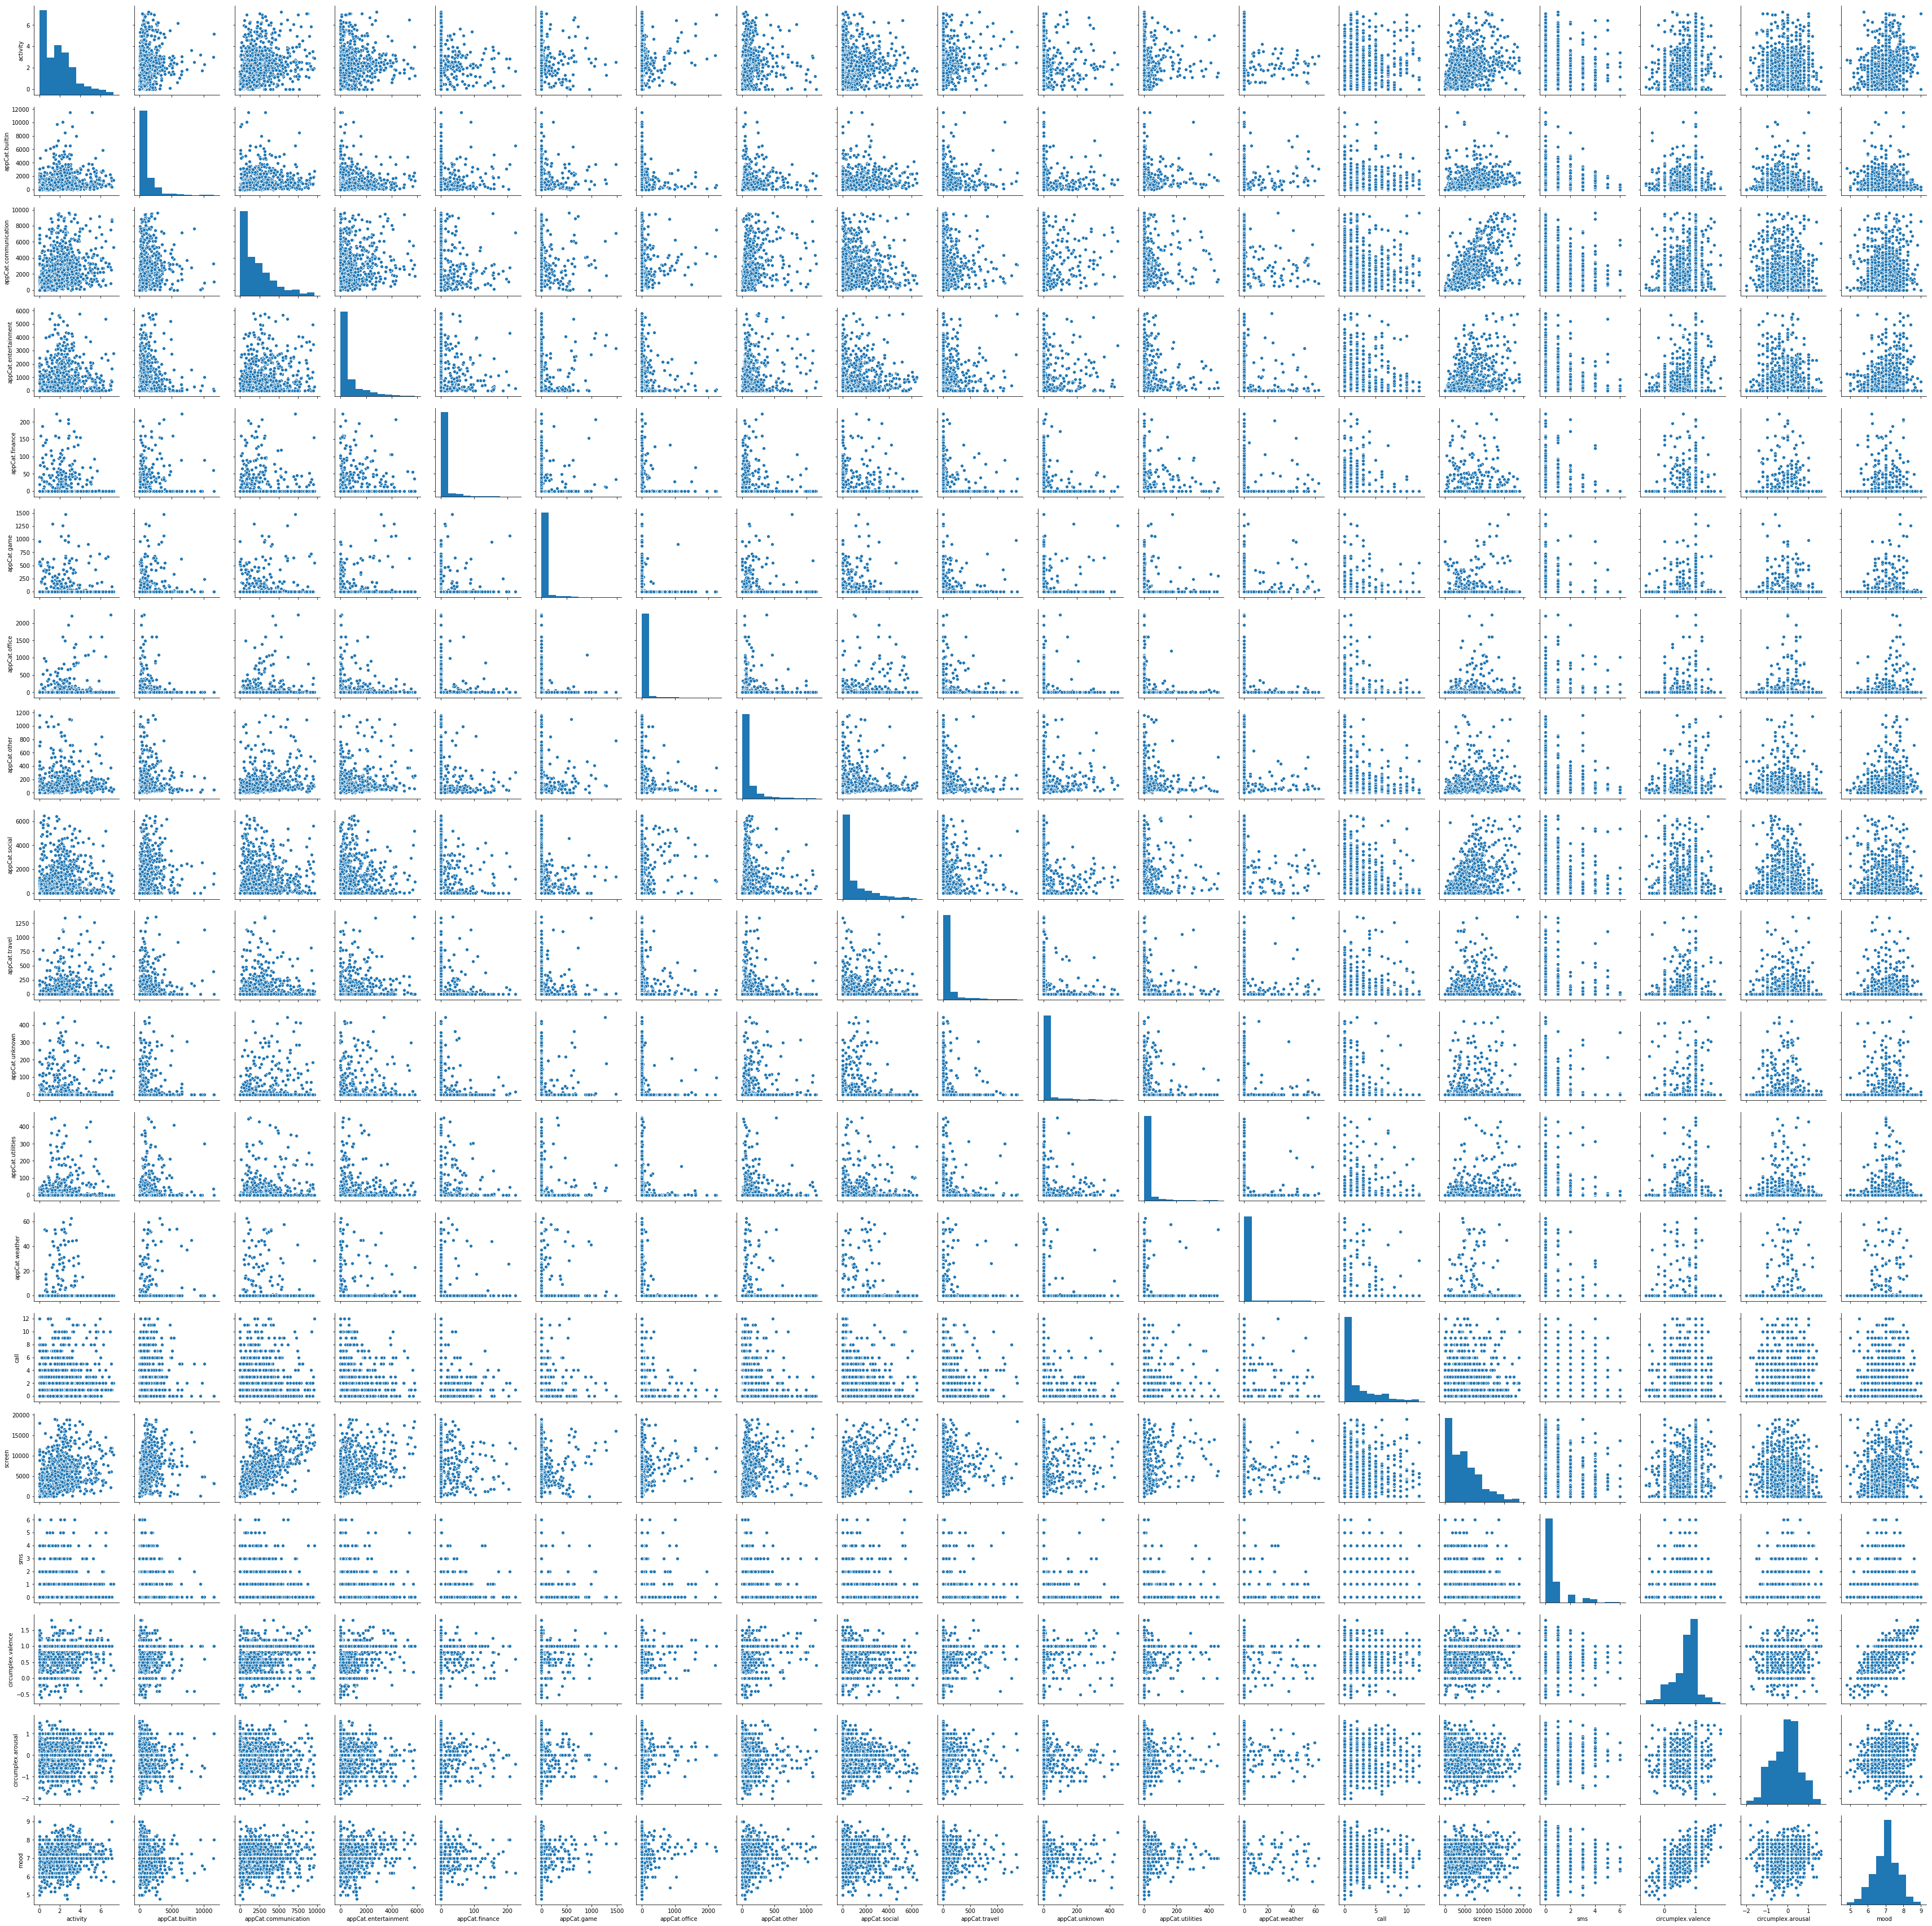

In [8]:
import seaborn as sns

sns.pairplot(data2.loc[:,data2.dtypes == 'float64'])

Valence appears to be multivariate gaussian - others seem to be just noise so will decompose into principal components

### Correlation between predictors

In [ ]:
corr_matrix_data2 = data2.corr()
corr_matrix_data2['mood']

In [ ]:
corr_matrix_df = df.corr()
corr_matrix_df['mood']

# Clustering analysis

### Average data for each individual

In [ ]:
cluster = data2.groupby(level='id').agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})

cluster_data = cluster[['mood', 'screen', 'activity']]

cluster_data


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(cluster_data)
y_kmeans = kmeans.predict(cluster_data)

print(kmeans.labels_)

# plt.scatter(kmeans.labels_)

#plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.figure()
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
# plt.scatter(cluster_data.mood, cluster_data.screen, cluster_data.circumplex.valence)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(cluster_data.mood, cluster_data.screen, cluster_data.activity)

ax.set_xlabel('Mood')
ax.set_ylabel('Screen')
ax.set_zlabel('Activity')

plt.show()

In [ ]:
plt.scatter(data2[:, 0], data2[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Generate train and test sets using random sampling

In [13]:
#This randomly selects a subset of the data to be test set - currently just one test set

def create_sets(dataframe, train_proportion, daily):
    
    if daily == True:
        dataframe = dataframe.reset_index(['id', 'time'])
        
    rand_indices = list(np.random.randint(len(dataframe), size=int(len(dataframe)*(1-train_proportion))))
    test = dataframe[dataframe.index.isin(rand_indices)]
    train = dataframe.drop(rand_indices, axis=0)
    
    if daily == True:
        train.set_index(['id', 'time'], inplace=True)
        test.set_index(['id', 'time'], inplace=True)
    
    return train, test


# Evaluation metrics

In [14]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m, X_train, y_train, X_test, y_test):
    res = ['RMSE on training: ', rmse(m.predict(X_train), y_train), 'RMSE on test: ', rmse(m.predict(X_test), y_test), 
           'R^2 on training: ',  m.score(X_train, y_train), 'R^2 on test: ', m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

# Mean model - Benchmark

In [ ]:
def mean_model(dataframe):
    
    
    

# Linear regression

#### Mood observations - Model

In [ ]:
from sklearn.linear_model import LinearRegression

reg_train, reg_test = create_sets(df, 0.8, True)

X_reg_train = reg_train.drop('mood', axis=1)
y_reg_train = reg_train.mood

X_reg_test = reg_test.drop('mood', axis=1)
y_reg_test = reg_test.mood

X_reg_train.shape, y_reg_train.shape, X_reg_test.shape

mood_reg = LinearRegression().fit(X_reg_train, y_reg_train)

mood_reg.score()



####  Mood observations - Prediction

#### Daily - Model

In [ ]:
import statsmodels.api as sm

reg_train, reg_test = create_sets(data2, 0.8, True)

X_reg_train = reg_train.drop('mood', axis=1)
y_reg_train = reg_train.mood

X_reg_test = reg_test.drop('mood', axis=1)
y_reg_test = reg_test.mood

X_reg_train.shape, y_reg_train.shape, X_reg_test.shape



X2 = sm.add_constant(X_reg_train)
est = sm.OLS(y_reg_train, X2).fit()
print(est.summary())


#Compare coefficients with scikitlearn 
daily_reg_model = LinearRegression().fit(X_reg_train, y_reg_train)

print('Scikitlearn output: ')

print('Intercept: ', daily_reg_model.intercept_) 
print()
print('Regression coefficients: ', daily_reg_model.coef_)
print()
print('R^2: ', daily_reg_model.score(X_reg_train, y_reg_train))


####  Mood observations - Prediction

In [ ]:
print_score(daily_reg_model, X_reg_train, y_reg_train, X_reg_test, y_reg_test)

# Principle component Analysis

It's very probable that many of the apps serve similar purposes for the user and therefore may have a similar effect - a PCA could possibly decompose these features into a smaller subset representing e.g. A need for socializing (Messneger apps), boredom (News, finance)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Before we can run PCA we need to standarize all of the features

#Note that the dependent variable mood has been omitted

features = ['activity', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game', 
            'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities', 
            'appCat.weather', 'call', 'screen', 'sms', 'circumplex.arousal']
x = data2.loc[:, features].values
x = StandardScaler().fit_transform(x)

y = data2.loc[:,['mood']].values



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'], principalDf['principal component 3'])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])


# Principle component analysis for features most correlated with mood

In [ ]:
features_subset = ['activity', 'appCat.communication', 'appCat.entertainment', 'appCat.game', 
            'appCat.office', 'appCat.other', 'circumplex.arousal']
x_subset = data2.loc[:, features_subset].values
x_subset = StandardScaler().fit_transform(x)

y = data2.loc[:,['mood']].values

pca = PCA(n_components=3)
principalComponents_subset = pca.fit_transform(x_subset)
principalDf_subset = pd.DataFrame(data = principalComponents_subset
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(principalDf_subset['principal component 1'], principalDf_subset['principal component 2'], principalDf_subset['principal component 3'])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

plt.scatter(principalDf_subset['principal component 1'], principalDf_subset['principal component 2'])


# Decision Tree - Mood measurement data

In [25]:
from sklearn.ensemble import RandomForestRegressor

df = df.astype(float)

train_set, test_set = create_sets(df, 0.8, True)

X_train = train_set.drop('mood', axis=1)
y_train = train_set.mood

X_test = test_set.drop('mood', axis=1)
y_test = test_set.mood

X_train.shape, y_train.shape, X_test.shape

rf = RandomForestRegressor(n_jobs = 10)

rf.fit(X_train, y_train)

print(rf.feature_importances_)

rf.score(X_train, y_train)

print_score(rf, X_train, y_train, X_test, y_test)


C:\Users\corma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.067811 0.053733 0.051547 0.036017 0.004219 0.004919 0.013978 0.055857 0.044853 0.011055 0.006194 0.011537 0.00166
 0.016329 0.034695 0.45419  0.054245 0.008159 0.005963 0.006724 0.007011 0.00536  0.004565 0.008651 0.007508 0.00073
 0.008731 0.007772 0.00545  0.000538 0.      ]
['RMSE on training: ', 0.3406284736349288, 'RMSE on test: ', 0.7281964152674272, 'R^2 on training: ', 0.8796467373958701, 'R^2 on test: ', 0.49366964448566397]


In [17]:
df

variable                     activity  appCat.builtin  appCat.communication  \
id      time                                                                  
AS14.01 2014-02-26 13:00:00  0.000000           0.000                 0.000   
        2014-02-26 15:00:00  0.000000           0.000                 0.000   
        2014-02-26 18:00:00  0.000000           0.000                 0.000   
        2014-02-26 21:00:00  0.000000           0.000                 0.000   
        2014-02-27 09:00:00  0.000000           0.000                 0.000   
        2014-02-27 12:00:00  0.000000           0.000                 0.000   
        2014-02-27 15:00:00  0.000000           0.000                 0.000   
        2014-03-21 11:00:00  0.065054         587.566              1794.749   
        2014-03-21 19:00:00  0.766375         147.965              1197.682   
        2014-03-21 21:00:00  0.244908         992.003              1626.808   
        2014-03-22 08:00:00  0.125000         185.214                41.268   
        2014-03-22 12:00:00  1.266726         152.193               955.898   
        2014-03-22 15:00:00  0.997899         273.741              1286.108   
        2014-03-22 18:00:00  1.073637         206.869               620.015   
        2014-03-22 21:00:00  0.310154          95.565              1979.698   
        2014-03-23 10:00:00  0.284211          13.095               121.199   
        2014-03-23 12:00:00  0.075630         107.658               274.379   
        2014-03-23 15:00:00  0.655730         261.738              1989.821   
        2014-03-23 19:00:00  0.482070         194.062               523.541   
        2014-03-23 21:00:00  0.590870         561.574               588.399   
        2014-03-24 09:00:00  0.261920         371.746              2194.162   
        2014-03-24 12:00:00  0.253261         186.009              2859.521   
        2014-03-24 15:00:00  0.775228          81.726               193.515   
        2014-03-24 18:00:00  0.453782         256.355              1320.211   
        2014-03-24 21:00:00  0.194061          71.204              1914.992   
        2014-03-25 09:00:00  0.229301         216.922              2902.225   
        2014-03-25 15:00:00  1.332082          72.514              2658.167   
        2014-03-25 20:00:00  0.649403         460.854              1627.391   
        2014-03-25 21:00:00  0.042735           9.049               810.825   
        2014-03-26 12:00:00  0.378644         418.822               991.072   
...                               ...             ...                   ...   
AS14.33 2014-05-24 12:00:00  0.024000         143.972                 0.000   
        2014-05-24 15:00:00  0.058333         442.998                88.746   
        2014-05-24 18:00:00  0.125210         100.183               210.155   
        2014-05-24 23:00:00  0.067227           7.034               502.099   
        2014-05-25 11:00:00  3.352771        1344.815              1436.688   
        2014-05-25 12:00:00  0.076923         668.880                 0.000   
        2014-05-25 15:00:00  0.043103          93.781               227.788   
        2014-05-25 21:00:00  0.220815         302.743               673.971   
        2014-05-26 10:00:00  0.404749         410.311               650.445   
        2014-05-26 14:00:00  0.634508         131.317               160.498   
        2014-05-26 15:00:00  0.245763         422.549                67.264   
        2014-05-26 18:00:00  0.213034         339.385               804.701   
        2014-05-26 21:00:00  0.019767          93.739               122.790   
        2014-05-27 13:00:00  0.017241         239.131               813.081   
        2014-05-27 15:00:00  0.075000          14.083                27.093   
        2014-05-27 18:00:00  0.000000          21.088               243.493   
        2014-05-27 21:00:00  0.060682          49.860                92.525   
        2014-05-28 09:00:00  0.710264         446.

# Decision Tree/Random forest - Daily data

In [24]:
from sklearn.ensemble import RandomForestRegressor

data2 = data2.astype(float)

train_set, test_set = create_sets(data2, 0.8, True)

X_train = train_set.drop('mood', axis=1)
y_train = train_set.mood

X_test = test_set.drop('mood', axis=1)
y_test = test_set.mood

X_train.shape, y_train.shape, X_test.shape

rf = RandomForestRegressor(n_jobs = 100)

rf.fit(X_train, y_train)

print(rf.feature_importances_)

rf.score(X_train, y_train)

print_score(rf, X_train, y_train, X_test, y_test)



C:\Users\corma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.040045 0.047691 0.038404 0.057628 0.015539 0.018659 0.038466 0.039798 0.044206 0.031803 0.01186  0.00987  0.012831
 0.025758 0.038407 0.014949 0.4164   0.097686]
['RMSE on training: ', 0.21343597849163704, 'RMSE on test: ', 0.4478665970411399, 'R^2 on training: ', 0.885667804431888, 'R^2 on test: ', 0.2789862659540655]


# Boosted trees

In [21]:
data2

activity  appCat.builtin  appCat.communication  \
id      time                                                          
AS14.01 2014-02-26   0.000000           0.000                 0.000   
        2014-03-22   5.931200        2017.675             10200.237   
        2014-03-24   1.895065         866.956              9270.629   
        2014-03-26   5.940634        2396.824             15925.265   
        2014-03-28   2.296753       10062.595               866.833   
        2014-03-30   2.379433        3375.770              6631.142   
        2014-04-03   3.040543        1957.829              5481.628   
        2014-04-05   1.545787        4548.662              3355.743   
        2014-04-07   3.023944        1820.066             16832.568   
        2014-04-09   1.895115         715.355              4881.411   
        2014-04-11   3.653646        3671.477              9931.675   
        2014-04-13   0.336512         447.415              1096.795   
        2014-04-15   4.949340        2519.969             11399.247   
        2014-04-17   2.256792        1860.898              5341.657   
        2014-04-19   4.107139        1843.276              7712.984   
        2014-04-21   2.448985        3442.232              2004.347   
        2014-04-23   1.103657        1130.842              8928.472   
        2014-04-25   7.545187        1682.132              9847.001   
        2014-04-27   0.670536        1291.314              2431.498   
        2014-04-29   2.466198        5289.913              3834.645   
        2014-05-03   2.860028        1758.438              3381.689   
AS14.02 2014-03-16   1.176479        3666.393              7669.945   
        2014-03-20  12.687669        4008.280              5012.817   
        2014-03-22   5.393943         894.506              1839.899   
        2014-03-24   9.279320        3880.427              5800.932   
        2014-03-26  12.547259        4003.868              5530.892   
        2014-03-28   6.278360        1053.115              1245.127   
        2014-03-30   5.563408         772.787              1110.856   
        2014-04-01   6.287053        2790.014              1322.610   
        2014-04-03   5.454489        1121.689              2809.436   
...                       ...             ...                   ...   
AS14.32 2014-04-21   0.716641         157.154              3546.580   
        2014-04-23   4.188373        2173.974              4695.506   
        2014-04-25   2.937046        1097.703              3378.699   
        2014-04-27   2.687769        3708.163              3683.333   
        2014-04-29   4.257087         575.284              3791.223   
        2014-05-01   5.058965        1129.760              5059.501   
        2014-05-03   4.763047         663.055              4323.511   
        2014-05-07   1.640126         725.719              2027.831   
        2014-05-09   5.018709        1925.698              5267.568   
        2014-05-11   3.113634         403.986              1841.427   
AS14.33 2014-04-15   1.045303         765.403              1107.526   
        2014-04-17   2.544406        3998.196              2688.682   
        2014-04-19   6.223335        2879.461              3989.499   
        2014-04-23   2.602072        3881.756              2795.211   
        2014-04-29   2.232420        5279.843              1908.499   
        2014-05-01   4.265357        3494.608              1378.092   
        2014-05-05   0.849829        3414.668              1233.936   
        2014-05-07   1.754142        2636.591              1899.745   
        2014-05-09   2.184266        2091.841               867.868   
        2014-05-11   0.844340        1456.425              1570.434   
        2014-05-13   2.750980        2774.510              4501.654   
        2014-05-15   1.242752        2212.464               541.080   
        2014-05-17   0.400166        1018.142               428.547   
        2014-05-19   0.605548         727.911

# Individual models (ARIMA?)